# Imports

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math

# Loading the Data

## Markdown Cells

In [3]:
md_filepath = 'markdown_group.csv'
md_original = pd.read_csv(md_filepath)

In [4]:
# create a variable where we will modify the dataframe
md_df = md_original.copy()

In [5]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,...,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,3,594,True,False,False,False,0.507588,0.044444,3.0,0.0,...,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,6,1222,True,False,False,False,1.000000,0.161290,1.0,0.0,...,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,7,1447,True,False,False,False,0.970851,0.375887,1.0,0.0,...,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,12,2705,True,False,False,False,1.000000,0.461538,1.0,0.0,...,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,15,2861,True,False,False,True,1.000000,0.461538,1.0,0.0,...,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [7]:
# drop the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [10]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(list(md_df), md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('markdown_prop', dtype('float64'))),
 (6, ('num_contrib', dtype('float64'))),
 (7, ('image_prop', dtype('float64'))),
 (8, ('is_education', dtype('bool'))),
 (9, ('has_links', dtype('bool'))),
 (10, ('has_comments', dtype('bool'))),
 (11, ('md_frequency', dtype('float64'))),
 (12, ('has_title', dtype('bool'))),
 (13, ('num_commits', dtype('float64'))),
 (14, ('md_format', dtype('bool'))),
 (15, ('non_exec_prop', dtype('float64'))),
 (16, ('exec_inorder', dtype('float64'))),
 (17, ('exec_skips', dtype('float64'))),
 (18, ('has_error', dtype('bool')))]

In [12]:
# isolate the quantitative variables
md_quant_vars = [list(md_df)[i] for i in [4, 5, 6, 7, 11, 13, 15, 16, 17]]
md_quant_vars

['jupyter_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'md_frequency',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips']

In [14]:
# dataframe of just quantitative variables
md_quant_df = md_df[md_quant_vars]

In [15]:
# initial look at the quantitative data
md_quant_df.head()

,jupyter_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips
0,0.507588,0.044444,3.0,0.0,0.068182,1.0,0.000000,1.000000,1.809524
1,1.000000,0.161290,1.0,0.0,0.333333,2.0,0.961538,1.000000,0.000000
2,0.970851,0.375887,1.0,0.0,0.621429,1.0,0.988636,1.000000,0.000000
3,1.000000,0.461538,1.0,0.0,0.640000,1.0,0.000000,0.923077,1.615385
4,1.000000,0.461538,1.0,0.0,0.520000,1.0,0.000000,1.000000,6.333333


## No Markdown Cells

In [16]:
no_md_filepath = 'no_markdown_group.csv'
no_md_original = pd.read_csv(no_md_filepath)

In [17]:
# create a variable where we will modify the dataframe
no_md_df = no_md_original.copy()

In [18]:
# initial look at the data
no_md_df.head()

,Unnamed: 0,nb_id,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,8,1589,False,0.714130,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False
1,10,1919,False,0.997840,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True
2,14,2857,False,0.121957,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False
3,27,4339,False,1.000000,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False
4,29,4659,False,0.940063,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True


In [19]:
# drop the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [20]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(list(no_md_df), no_md_df.dtypes)))

[(0, ('has_author', dtype('bool'))),
 (1, ('jupyter_prop', dtype('float64'))),
 (2, ('num_contrib', dtype('float64'))),
 (3, ('image_prop', dtype('float64'))),
 (4, ('is_education', dtype('bool'))),
 (5, ('has_comments', dtype('bool'))),
 (6, ('num_commits', dtype('float64'))),
 (7, ('non_exec_prop', dtype('float64'))),
 (8, ('exec_inorder', dtype('float64'))),
 (9, ('exec_skips', dtype('float64'))),
 (10, ('has_error', dtype('bool')))]

In [21]:
# isolate the quantitative variables
no_md_quant_vars = [list(no_md_df)[i] for i in [1, 2, 3, 6, 7, 8, 9]]
no_md_quant_vars

['jupyter_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips']

In [22]:
# dataframe of just quantitative variables
no_md_quant_df = no_md_df[no_md_quant_vars]

In [23]:
# initial look at the quantitative data
no_md_quant_df.head()

,jupyter_prop,num_contrib,image_prop,num_commits,non_exec_prop,exec_inorder,exec_skips
0,0.714130,1.0,0.142857,1.0,0.00000,1.000000,1.000000
1,0.997840,1.0,0.187500,1.0,0.04878,0.789474,10.631579
2,0.121957,5.0,0.000000,11.0,0.00000,0.909091,6.181818
3,1.000000,1.0,0.000000,1.0,0.00000,1.000000,1.631579
4,0.940063,3.0,0.000000,3.0,0.12500,1.000000,1.000000


# First Attempt - Standardizing the Data

We will first attempt to standardize the data, then bin

In [33]:
# labels used for 3 bins (will combine medium1 and medium2)
four_labels = ['low', 'medium1', 'medium2', 'high']

In [34]:
# labels used for 2 bins
two_labels = ['lower', 'higher']

## Markdown Cells

### Standardize

In [26]:
# noramlize all variables
md_quant_stand = md_quant_df.loc[:, md_quant_vars].values
md_quant_stand = StandardScaler().fit_transform(md_quant_stand)

In [29]:
# check that the normalized data has a mean of zero and std of one
print(np.mean(md_quant_stand), np.std(md_quant_stand))

8.770218063482492e-17 1.0


In [31]:
# put the normalized features back into dataframe format
md_stand_df = pd.DataFrame(md_quant_stand, columns = md_quant_vars)

# initial look at the standardized data
md_stand_df.head()

,jupyter_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips
0,-1.293088,-1.942050,0.504838,-0.960204,-1.964232,-0.399981,-0.410421,0.690767,-0.337021
1,0.570932,-1.286070,-0.201473,-0.960204,-0.934795,-0.056390,3.185141,0.690767,-0.487356
2,0.460589,-0.081313,-0.201473,-0.960204,0.183720,-0.399981,3.286470,0.690767,-0.487356
3,0.570932,0.399542,-0.201473,-0.960204,0.255823,-0.399981,-0.410421,0.003778,-0.353150
4,0.570932,0.399542,-0.201473,-0.960204,-0.210071,-0.399981,-0.410421,0.690767,0.038819


### Bin

In [32]:
# create a copy of the data that we will bin 
md_binned_df = md_stand_df.copy()

In [35]:
# for each quantitative field in the data
for quant_var in md_quant_vars:
    
    # change the column in the dataframe so that it is binned into low, medium, and high
    md_binned_df.loc[:, quant_var] = pd.cut(md_binned_df[quant_var], 4, labels = four_labels)
    
    # combine medium1 and medium2
    md_binned_df.loc[:, quant_var] = md_binned_df[quant_var].replace(['medium1', 'medium2'], 'medium')

In [36]:
# initial look at the binned data
md_binned_df.head()

,jupyter_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips
0,medium,low,low,low,low,low,low,high,low
1,high,low,low,low,medium,low,high,high,low
2,high,medium,low,low,medium,low,high,high,low
3,high,medium,low,low,medium,low,low,high,low
4,high,medium,low,low,medium,low,low,high,low


In [37]:
# check the bin counts
for quant_var in md_quant_vars:
    print(md_binned_df[quant_var].value_counts())

high      1804
medium     346
low        141
Name: jupyter_prop, dtype: int64
medium    1672
low        544
high        75
Name: markdown_prop, dtype: int64
low       2218
medium      61
high        12
Name: num_contrib, dtype: int64
low       1196
medium     881
high       214
Name: image_prop, dtype: int64
medium    1276
high       660
low        355
Name: md_frequency, dtype: int64
low       2192
medium      90
high         9
Name: num_commits, dtype: int64
low       2003
high       173
medium     115
Name: non_exec_prop, dtype: int64
high      2130
medium     157
low          4
Name: exec_inorder, dtype: int64
low       2255
medium      34
high         2
Name: exec_skips, dtype: int64


No change, so this attempt failed

# Second Attempt - Data Transformations

Maybe we can do some kind of data transformation on the variables

## Markdown Cells

The data is extremely left-skewed, so we can try squaring the data. Based on the binning numbers from the previous cell, I believe the columns that we have to transform are:

- `markdown_prop` - sqrt, 3 bins
- `num_contrib` - log + 0.5, 2 bins
- `num_commits` - log + 0.5, 2 bins
- `exec_inorder` - square, 2 bins
- `exec_skips` - log + 0.5, 2 bins

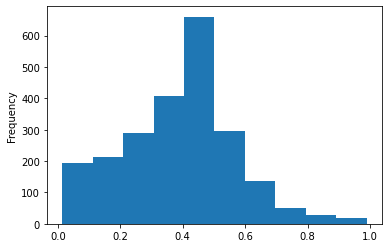

In [75]:
# create a copy of markdown_prop column that we will play with
md_markdown_prop = md_quant_df['markdown_prop'].copy()

# plot the data
md_markdown_prop.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data

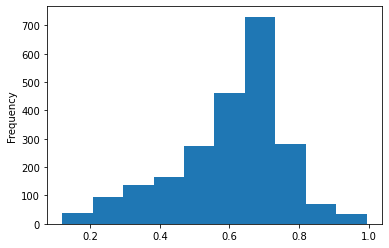

In [76]:
# transform the column
md_markdown_prop = md_markdown_prop.transform(lambda x : math.sqrt(x))

# plot the column again
md_markdown_prop.plot(kind = 'hist')

In [77]:
# try to bin the data again
md_markdown_prop = pd.cut(md_markdown_prop, 4, labels = four_labels)

# combine medium1 and medium2
md_markdown_prop = md_markdown_prop.replace(['medium1', 'medium2'], 'medium')

# check bin counts
md_markdown_prop.value_counts()

medium    1879
high       216
low        196
Name: markdown_prop, dtype: int64

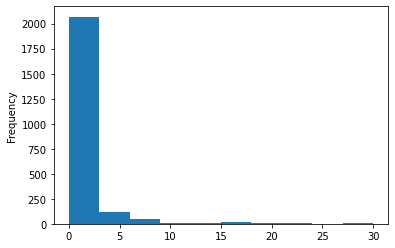

In [97]:
# create a copy of num_contrib column
md_num_contrib = md_quant_df['num_contrib'].copy()

# plot the data
md_num_contrib.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [98]:
# put the data into two bins
md_num_contrib = pd.cut(md_num_contrib, 2, labels = two_labels)

# check the bin counts
md_num_contrib.value_counts()

lower     2255
higher      36
Name: num_contrib, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

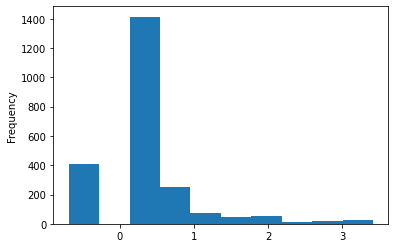

In [127]:
# go back to original quantitative form of the column
md_num_contrib = md_quant_df['num_contrib'].copy()

# transform the column
md_num_contrib = md_num_contrib.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_contrib.plot(kind = 'hist')

In [128]:
# try to bin the data again
md_num_contrib = pd.cut(md_num_contrib, 2, labels = two_labels)

# check bin counts
md_num_contrib.value_counts()

lower     2140
higher     151
Name: num_contrib, dtype: int64

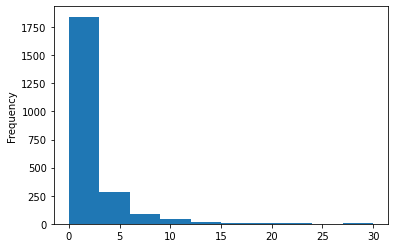

In [123]:
# make a copy of the num_commits column
md_num_commits = md_quant_df['num_commits'].copy()

# plot the data
md_num_commits.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [124]:
# put the data into two bins
md_num_commits = pd.cut(md_num_commits, 2, labels = two_labels)

# check the bin counts
md_num_commits.value_counts()

lower     2266
higher      25
Name: num_commits, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

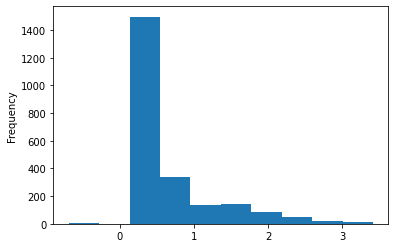

In [130]:
# go back to original quantitative form of the column
md_num_commits = md_quant_df['num_commits'].copy()

# transform the column
md_num_commits = md_num_commits.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_commits.plot(kind = 'hist')

In [131]:
# try to bin the data again
md_num_commits = pd.cut(md_num_commits, 2, labels = two_labels)

# check bin counts
md_num_commits.value_counts()

lower     1981
higher     310
Name: num_commits, dtype: int64

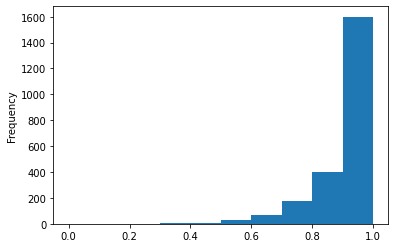

In [139]:
# make a copy of the exec_inorder column
md_exec_inorder = md_quant_df['exec_inorder'].copy()

# plot the column
md_exec_inorder.plot(kind = 'hist')

Since the data is left-skewed, we can try squaring the data. Tried squaring and cubing the data and unsuccessful, so we switch to two bins for this column

In [140]:
# put column into two bins
md_exec_inorder = pd.cut(md_exec_inorder, 2, labels = two_labels)

# check the binc ounts
md_exec_inorder.value_counts()

higher    2268
lower       23
Name: exec_inorder, dtype: int64

Since the bin numbers are still too low, we still perform a data transformation

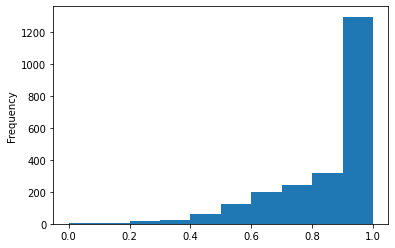

In [141]:
md_exec_inorder = md_quant_df['exec_inorder'].copy()

# transform the column
md_exec_inorder = md_exec_inorder.transform(lambda x : x ** 2)

# plot again
md_exec_inorder.plot(kind = 'hist')

In [142]:
# try to bin the data again
md_exec_inorder = pd.cut(md_exec_inorder, 2, labels = two_labels)

# check bin counts
md_exec_inorder.value_counts()

higher    2180
lower      111
Name: exec_inorder, dtype: int64

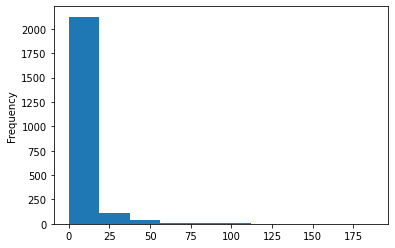

In [153]:
# make a copy of the exec_skips column
md_exec_skips = md_quant_df['exec_skips'].copy()

# plot the column
md_exec_skips.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [154]:
# put the data into two bins
md_exec_skips = pd.cut(md_exec_skips, 2, labels = two_labels)

# check the bin counts
md_exec_skips.value_counts()

lower     2284
higher       7
Name: exec_skips, dtype: int64

Since the bin counts are still too low, we still do a data transformation

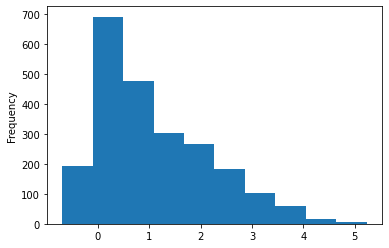

In [159]:
md_exec_skips = md_quant_df['exec_skips'].copy()

# transform the column
md_exec_skips = md_exec_skips.transform(lambda x : math.log(x + 0.5))

# plot again
md_exec_skips.plot(kind = 'hist')

In [160]:
# try to bin the data again
md_exec_skips = pd.cut(md_exec_skips, 2, labels = two_labels)

# check bin counts
md_exec_skips.value_counts()

lower     1925
higher     366
Name: exec_skips, dtype: int64

# Export the Binned Data

In [164]:
# function that performs binning (2 or 3 bins)
def bin_column(col,  num_bins):
    
    if num_bins == 2:
        return pd.cut(col, 2, labels = two_labels)
    elif num_bins == 3:
        # put data into four bins first
        four_bins = pd.cut(col, 4, labels = four_labels)
        
        # combine medium1 and medium2
        return four_bins.replace(['medium1', 'medium2'], 'medium')
    else:
        return None

## Markdown Cells

In [162]:
# python dictionary of quantitative fields and the number of bins + transformations
quant_bins = {
    'jupyter_prop': (3, lambda x : x),
    'markdown_prop': (3, lambda x : math.sqrt(x)),
    'num_contrib': (2, lambda x : math.log(x + 0.5)),
    'image_prop': (3, lambda x : x),
    'md_frequency': (3, lambda x : x),
    'num_commits': (2, lambda x : math.log(x + 0.5)),
    'non_exec_prop': (3, lambda x : x),
    'exec_inorder': (2, lambda x : x ** 2),
    'exec_skips': (2, lambda x : math.log(x + 0.5))
}

In [163]:
# create the dataframe that we will perform binning on
md_binned_df = md_df.copy()

In [165]:
# for each column in the dataframe
for var in list(md_binned_df):
    
    # check if quantitative (then it needs to be binned)
    if var in quant_bins.keys():
        
        # extract the number of bins and the transformation
        (bins, transformation) = quant_bins[var]
        
        # perform the transformation
        md_binned_df[var] = md_binned_df[var].apply(transformation)
        
        # bin the data
        md_binned_df[var] = bin_column(md_binned_df[var], bins)

In [166]:
# initial look at the binned data 
md_binned_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,True,False,False,False,medium,low,lower,low,True,True,False,low,True,lower,True,low,higher,lower,False
1,True,False,False,False,high,medium,lower,low,True,True,True,medium,False,lower,True,high,higher,lower,False
2,True,False,False,False,high,medium,lower,low,True,True,True,medium,True,lower,True,high,higher,lower,False
3,True,False,False,False,high,medium,lower,low,True,True,True,medium,True,lower,False,low,higher,lower,False
4,True,False,False,True,high,medium,lower,low,False,False,True,medium,False,lower,False,low,higher,lower,False


In [168]:
# check the bin counts
for quant_var in md_quant_vars:
    print(md_binned_df[quant_var].value_counts())

high      1804
medium     346
low        141
Name: jupyter_prop, dtype: int64
medium    1879
high       216
low        196
Name: markdown_prop, dtype: int64
lower     2140
higher     151
Name: num_contrib, dtype: int64
low       1241
medium     873
high       177
Name: image_prop, dtype: int64
medium    1276
high       660
low        355
Name: md_frequency, dtype: int64
lower     1981
higher     310
Name: num_commits, dtype: int64
low       2003
high       173
medium     115
Name: non_exec_prop, dtype: int64
higher    2180
lower      111
Name: exec_inorder, dtype: int64
lower     1925
higher     366
Name: exec_skips, dtype: int64


In [169]:
# export the binned data to a csv
md_binned_df.to_csv('markdown-group-binned.csv')